In [1]:
#ce programme permet d'enregistrer un son depuis la prise micro de mon pc

import pyaudio
import wave


# Initialiser PyAudio
p = pyaudio.PyAudio()

# Ouvrir le flux audio pour la prise jack
stream = p.open(format=pyaudio.paInt16, channels=1, rate=44100, input=True, frames_per_buffer=1024) #chanel=1 pour mono /chanel = 2 pour stereo

# Enregistrer le son
frames = []
for i in range(0, int(44100 / 1024 * 5)):   #fréquence d'échantillonage = 44100Hz, le nombre de bloc dans une frame est de 1024 donc on a 44100/1024=43 bloc par seconde *10 ce qui fait 430 blocs pour 10 seconde 
    data = stream.read(1024)
    frames.append(data)

# Fermer le flux audio
stream.stop_stream()
stream.close()
p.terminate()

# Écrire les données audio enregistrées dans un fichier WAV
with wave.open("enregistrement.wav", "wb") as wf:
    wf.setnchannels(1)                                                                      #=1 pour mono / 2 pour stereo ->mono pour le TP de communication numérique et stéréo pour celui de mesure de vitesse du son 
    wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
    wf.setframerate(44100)
    wf.writeframes(b''.join(frames))





ALSA lib pcm_dsnoop.c:601:(snd_pcm_dsnoop_open) unable to open slave
ALSA lib pcm_dmix.c:1032:(snd_pcm_dmix_open) unable to open slave
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.rear
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.center_lfe
ALSA lib pcm.c:2664:(snd_pcm_open_noupdate) Unknown PCM cards.pcm.side
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
Cannot connect to server socket err = No such file or directory
Cannot connect to server request channel
jack server is not running or cannot be started
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
JackShmReadWritePtr::~JackShmReadWritePtr - Init not done for -1, skipping unlock
ALSA lib con

In [ ]:
import sounddevice as sd
import numpy as np
import threading
import wave

class Recorder:
    def __init__(self, filename):
        self.filename = filename
        self.frames = []
        self.recording = False

    def start_recording(self, channels, samplerate):
        self.recording = True
        self.frames = []
        threading.Thread(target=self.record, args=(channels, samplerate)).start()

    def stop_recording(self):
        self.recording = False

    def record(self, channels, samplerate):
        with wave.open(self.filename, mode='wb') as wf:
            wf.setnchannels(channels)
            wf.setsampwidth(2)
            wf.setframerate(samplerate)
            with sd.InputStream(channels=channels, samplerate=samplerate, blocksize=1024) as stream:
                while self.recording:
                    data, _ = stream.read(1024)
                    self.frames.append(data)
                    wf.writeframes(data)

    def get_frames(self):
        return self.frames

def play_sound():
    duration = 5.0
    samplerate = sd.query_devices('default')['default_samplerate']
    samples = int(duration * samplerate)
    sound = np.random.randn(samples, 1)
    sd.play(sound, samplerate=samplerate)
    sd.wait()

recorder = Recorder('enregistrement.wav')
recorder.start_recording(channels=2, samplerate=44100)

play_sound()

recorder.stop_recording()
frames = recorder.get_frames()

print('Enregistrement terminé.')


In [122]:
import pyaudio
import wave

# Initialiser PyAudio
p = pyaudio.PyAudio()

# Ouvrir le flux audio pour la prise jack avec 3 canaux (mono + gauche + droite)
stream = p.open(format=pyaudio.paInt16, channels=3, rate=44100, input=True, frames_per_buffer=1024)

# Enregistrer le son
frames_mono = []
frames_left = []
frames_right = []
for i in range(0, int(44100 / 1024 * 5)):
    data = stream.read(1024)
    # Extraire les données des 3 canaux
    mono_data = data[0::3]
    left_data = data[1::3]
    right_data = data[2::3]
    # Ajouter les données à chaque canal
    frames_mono.append(mono_data)
    frames_left.append(left_data)
    frames_right.append(right_data)

# Fermer le flux audio
stream.stop_stream()
stream.close()
p.terminate()

# Écrire les données audio enregistrées dans un fichier WAV pour chaque canal
with wave.open("enregistrement_mono.wav", "wb") as wf:
    wf.setnchannels(1)
    wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
    wf.setframerate(44100)
    wf.writeframes(b''.join(frames_mono))
    
with wave.open("enregistrement_gauche.wav", "wb") as wf:
    wf.setnchannels(1)
    wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
    wf.setframerate(44100)
    wf.writeframes(b''.join(frames_left))
    
with wave.open("enregistrement_droit.wav", "wb") as wf:
    wf.setnchannels(1)
    wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
    wf.setframerate(44100)
    wf.writeframes(b''.join(frames_right))


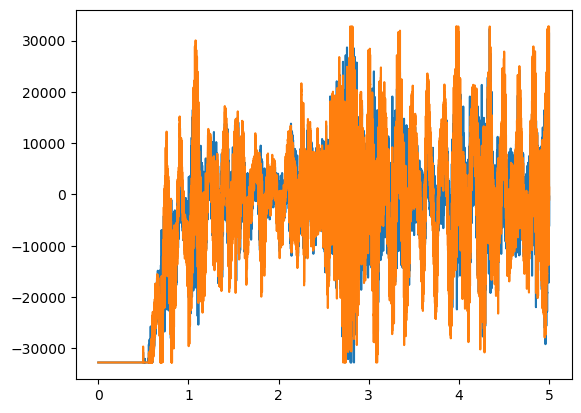

In [6]:
#permet d'afficher un son
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier audio
rate, data = scipy.io.wavfile.read('enregistrement.wav')



N=len(data) #nombre d'échantillions 
n = np.arange(0,N)/44100   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 



#affichage du channel 1 
plt.figure()
plt.plot(n,data)


#plt.ylim(-10000,10000)
plt.show()




jusque ici tout fonctionnait bien

In [159]:
import pyaudio
import wave

# Initialiser PyAudio
p = pyaudio.PyAudio()

# Ouvrir le flux audio pour la prise jack
stream = p.open(format=pyaudio.paInt16, channels=2, rate=44100, input=True, frames_per_buffer=1024)

# Enregistrer le son
frames = []
for i in range(0, int(44100 / 1024 * 5)):
    data = stream.read(1024)
    frames.append(data)

# Fermer le flux audio
stream.stop_stream()
stream.close()
p.terminate()

# Écrire les données audio enregistrées dans un fichier WAV
with wave.open("enregistrement.wav", "wb") as wf:
    wf.setnchannels(2)  # 2 canaux pour le mode stéréo
    wf.setsampwidth(p.get_sample_size(pyaudio.paInt16))
    wf.setframerate(44100)
    wf.writeframes(b''.join(frames))


In [22]:
#programme pour mesurer la vitesse du son 



import sounddevice as sd
import soundfile as sf

# Paramètres d'enregistrement
duration = 5  # Durée de l'enregistrement en secondes
fs = 44100  # Fréquence d'échantillonnage en Hz
channels = 2  # Nombre de canaux

# Enregistrer le son
print("Enregistrement en cours...")
recorded_audio = sd.rec(int(duration * fs), samplerate=fs, channels=channels)
sd.wait()  # Attendre la fin de l'enregistrement
print("Enregistrement terminé.")

# Enregistrer les données audio dans un fichier WAV
file_name = "enregistrement.wav"
sf.write(file_name, recorded_audio, fs, subtype='PCM_16')

print(f"Fichier enregistré : {file_name}")


Enregistrement en cours...
Enregistrement terminé.
Fichier enregistré : enregistrement.wav


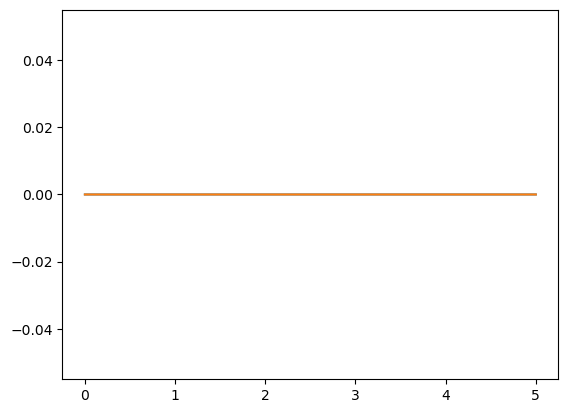

In [21]:
#permet d'afficher un son
import scipy.io.wavfile
import matplotlib.pyplot as plt
import numpy as np

# Charger le fichier audio
rate, data = scipy.io.wavfile.read('enregistrement.wav')



N=len(data) #nombre d'échantillions 
n = np.arange(0,N)/44100   #on divise par la fréquence d'échantillonage pour etre mieux dans l'échelle 



#affichage du channel 1 
plt.figure()
plt.plot(n,data)


#plt.ylim(-10000,10000)
plt.show()


